##### Name: K Lalith Aditya
##### Regd No: 22231
##### Datasets & DataLoaders

1 maintaining code gets difficult <br>
2 dataset model training code for better readability and modularity <br>
3 Pytorch produces two data primitives <br>
    1. torch.utils.data.DataLoader <br>
    2. torch.utils.data.Dataset <br>
These two will allow pre-loaded datasets to be used on the dataset <br>
Dataset : It loads the samples and the corresponding labels<br>
Dataloader : It wraps an iterable around the Dataset to access the data samples <br>


loading a dataset
Fashion-MNIST dataset from TorchVision
60000 - training samples
10000 - test samples


<br>

parameters to load the dataset 
root - its the path where train/test dataset is stored
train - specifies train/test dataset
download = True - downloads the data from the internet if the data is not avialable in the root
transform and target_transform specify the feature and label transformation

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [5]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

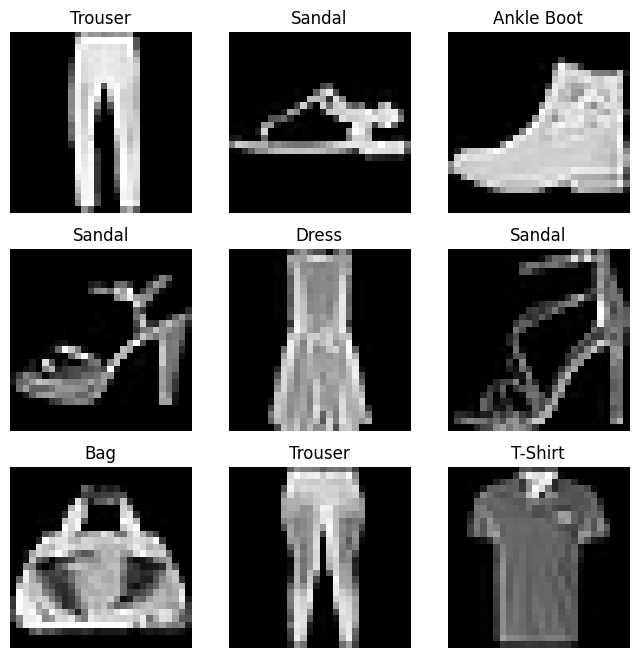

In [8]:
## Iterating and visualizing the dataset

# We can index the Datasets manually like a list: training_data[index]. We can use matplotlib to visualize some samples in the training data

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
} # dictionary

figure = plt.figure(figsize=(8, 8))
cols,rows = 3,3

for i in range(1, cols*rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx] # is unpacking the elements of the training_data at the randomly selected index sample_idx into two variables: img and label.
    figure.add_subplot(rows, cols, i) # creating subplots
    plt.title(labels_map[label]) # plotting the title for each subplot
    plt.axis("off") # remove axis and ticks for the plot
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()    


#### Creating a custom dataset for your files

In [11]:
!pip install pandas

                                              0.0/10.6 MB ? eta -:--:--
                                              0.1/10.6 MB 2.0 MB/s eta 0:00:06
                                              0.2/10.6 MB 1.7 MB/s eta 0:00:06
                                              0.3/10.6 MB 2.0 MB/s eta 0:00:06
     -                                        0.3/10.6 MB 1.9 MB/s eta 0:00:06
     -                                        0.4/10.6 MB 1.9 MB/s eta 0:00:06
     -                                        0.5/10.6 MB 1.8 MB/s eta 0:00:06
     --                                       0.6/10.6 MB 1.8 MB/s eta 0:00:06
     --                                       0.7/10.6 MB 1.7 MB/s eta 0:00:06
     --                                       0.7/10.6 MB 1.8 MB/s eta 0:00:06
     --                                       0.8/10.6 MB 1.8 MB/s eta 0:00:06
     --                                       0.8/10.6 MB 1.7 MB/s eta 0:00:06
     ---                                      0.9/10.6 MB 1


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os
import pandas as pd
from torchvision.io import read_image

In [15]:
class CustomImageDataset(Dataset): # custom class Dataset is obtained from torch.utils.data.Dataset
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): # annotations_file is path, img_dir is the directory 
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self): # Implements the __len__ method that returns the length of the dataset, which is the number of rows in the img_labels DataFrame.
        return len(self.img_labels)

    def __getitem__(self, idx): # __getitem__ method that returns a specific data sample from the dataset based on the provided index idx.
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # joining the dataframe
        image = read_image(img_path) # reads image data using torchvision.io.read_image
        label = self.img_labels.iloc[idx, 1] # retrieves the corresponding label from 'img_labels' at index 'idx' and assigns it to the 'label'
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label #Returns the transformed image and label as a tuple (image, label).

In [19]:
#### __init__
"""
The __init__ function is run once when instantiating the Dataset object. Initializing the directory containing the images, the annotations file and both the transforms
"""

'\nThe __init__ function is run once when instantiating the Dataset object. Initializing the directory containing the images, the annotations file and both the transforms\n'

In [21]:
def __init__(self, annotations_file, img_dir, transform = None, target_transform = None): # function with the parameters annotations_file is the path, img_dir is the path of the directory
    self.img_labels = pd.read_csv(annotations_file) # reading the csv file
    self.img_dir = img_dir # image directory
    self.transform = transform # transform
    self.target_transform = target_transform # target transform

In [23]:
### __len__
"""
the __len__ function returns the number of samples in the dataset
"""

'\nthe __len__ function returns the number of samples in the dataset\n'

In [25]:
def __len__(self):
    return len(self.img_labels) # returns the number of samples in the database

In [26]:
## __getitem__

"""
The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image's location on the disk, converts that to tensor using read_image, retreives the corresponding label from the csv data in the self.img_labels
"""

"\nThe __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image's location on the disk, converts that to tensor using read_image, retreives the corresponding label from the csv data in the self.img_labels\n"

In [28]:
def __getitem__(self,idx): #function
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0]) # joining the csv files
    image = read_image(img_path) # reading image from the path
    label = self.img_labels.iloc[idx,1] # labels from that index
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label    

In [29]:
## Preparing your data for training with DataLoaders

"""
The Dataset retreives our dataset's features and labels one sample at a time. While training the model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use python's multiprocessing to speed up data retreival.
"""

'\nThe Dataset retreives our dataset\'s features and labels one sample at a time. While training the model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use python\'s multiprocessing to speed up data retreival.\n'

In [31]:
from torch.utils.data import DataLoader # importing DataLoader from torch.utils.data
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) # loading training data with each batch containing 64 samples with shuffling
test_dataloader = DataLoader(test_data, batch_size =64, shuffle = True) # loading testing data with each batch containing 64 samples with shuffling

In [33]:
## Iterate through the DataLoader

"""
After loading the dataset into the DataLoader and can iterate through the dataset as needed. 
""" 

'\nAfter loading the dataset into the DataLoader and can iterate through the dataset as needed. \n'

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


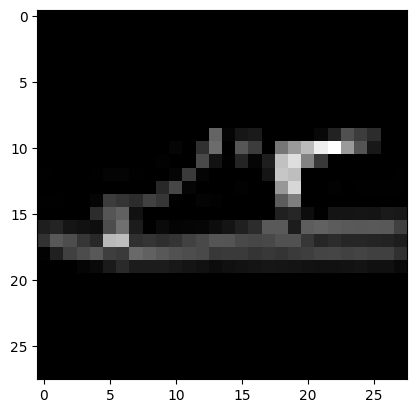

Label: 5


In [45]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader)) # iterator from train_dataloader and iterate among the batches than next will get the next batch of the data
print(f"Feature batch shape: {train_features.size()}") # number of training features
print(f"Labels batch shape: {train_labels.size()}") # number of train labels
img = train_features[0].squeeze() # first train_feature and remove single dimensional axes
label = train_labels[0] # selects the label corresponding to the first sample of the batch
plt.imshow(img,cmap='gray') # displaying the image
plt.show()
print(f"Label: {label}") # prints the label